<a href="https://colab.research.google.com/github/DaviCMaciel/LIT/blob/main/LIT_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN (K-Nearest Neighbors) com Iris Datasets

*   Tarefa 1:
1.   Github pessoal e notebook pessoal no Google Colab
2.   Classificador KNN com dataset íris (orquídeas)
3.   Exploração no valor de k
4.   Grid search (busca em grade) 30 realizações
*   Resultados:
1.   Acuracia, Recall, Precisão, F1-score
2.   Matriz de confusão na acurácia
3.   Gráfico box-plot de Acurácia.
4.   Outras formas de ver resultados q achar interessantes.


In [14]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
import seaborn

def mediaAri (numeros) :
  soma = sum(numeros)
  media = soma / len(numeros)
  return media

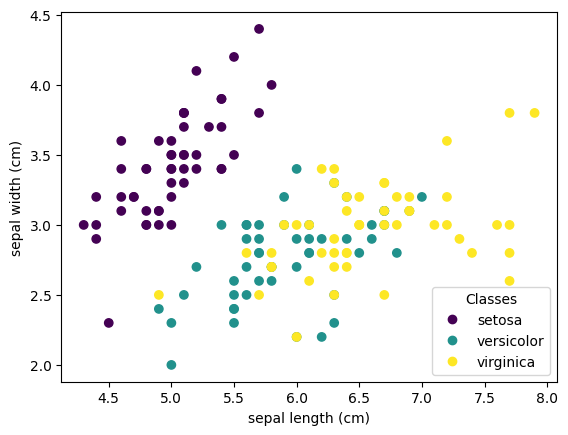

In [15]:
# Iris dataset

iris = datasets.load_iris()

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)



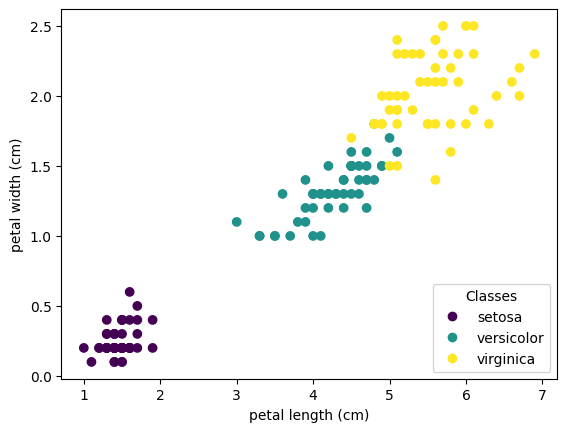

In [16]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [17]:
# Preparando os dados para treinamento e teste
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target

x = iris.data
y = iris.target

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
iris1 = iris_df.loc[iris_df.target.isin([0,1,2]), ['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)',	'petal width (cm)', 'target']]

x1 = iris1[['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)',	'petal width (cm)']]
x2 = iris1[['petal length (cm)',	'petal width (cm)']]
y = iris1['target']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y, test_size=0.4, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y, test_size=0.4, random_state=42)



acc2 = {}
acc4 = {}

In [19]:
# Teste com as 4 caracteristicas das flores
precc =[]

for k in range(1,31):
  knn = KNeighborsClassifier(n_neighbors=k)
  accs = []
  for j in range(1,31):
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y, test_size=0.3, random_state=j)
    knn = knn.fit(x1_train, y1_train)
    y1_pred = knn.predict(x1_test)
    accs.append(metrics.accuracy_score(y1_test, y1_pred) * 100)
    precc.append(metrics.precision_score(y1_test, y1_pred, average='macro') * 100)
  acc4[k] = accs


In [20]:
medias = []
for k, acuracia in acc4.items():
  print(f'Para K= {k}: {acuracia}')
  medias.append(mediaAri(acc4[k]))

Para K= 1: [97.77777777777777, 100.0, 95.55555555555556, 95.55555555555556, 93.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 100.0, 97.77777777777777, 93.33333333333333, 97.77777777777777, 95.55555555555556, 95.55555555555556, 97.77777777777777, 95.55555555555556, 97.77777777777777, 100.0, 93.33333333333333, 91.11111111111111, 95.55555555555556, 97.77777777777777, 97.77777777777777, 95.55555555555556, 93.33333333333333, 95.55555555555556, 93.33333333333333, 95.55555555555556, 88.88888888888889, 91.11111111111111]
Para K= 2: [97.77777777777777, 100.0, 95.55555555555556, 95.55555555555556, 93.33333333333333, 91.11111111111111, 95.55555555555556, 93.33333333333333, 97.77777777777777, 95.55555555555556, 93.33333333333333, 97.77777777777777, 91.11111111111111, 95.55555555555556, 95.55555555555556, 93.33333333333333, 95.55555555555556, 100.0, 91.11111111111111, 88.88888888888889, 93.33333333333333, 95.55555555555556, 97.77777777777777, 95.55555555555556, 95.5555555

In [21]:
print(medias)

[95.40740740740743, 94.81481481481485, 95.85185185185189, 95.48148148148151, 96.07407407407412, 95.77777777777783, 96.37037037037041, 96.0740740740741, 96.37037037037041, 96.1481481481482, 96.74074074074075, 96.22222222222224, 96.74074074074078, 96.22222222222224, 96.6666666666667, 96.0740740740741, 96.29629629629632, 95.77777777777781, 95.92592592592595, 95.2592592592593, 95.33333333333336, 94.74074074074079, 94.81481481481485, 94.88888888888893, 94.6666666666667, 95.11111111111114, 95.18518518518522, 94.74074074074079, 94.59259259259262, 94.4444444444445]


In [22]:
# Teste com apenas 2 das 4 caracteristicas das flores
k = list(range(1,31))
acc = []
prec = []

for i in k:
  knn = KNeighborsClassifier(n_neighbors=i)
  acc = []
  for j in k:
    x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y, test_size=0.4, random_state=j)
    knn = knn.fit(x2_train, y2_train)
    y2_pred = knn.predict(x2_test)
    acc.append(metrics.accuracy_score(y2_test, y2_pred) * 100)
    prec.append(metrics.precision_score(y2_test, y2_pred, average='macro') * 100)
  acc2[i] = acc


In [23]:
for k, acuracias in acc2.items():
  print(f'Para K= {k}: {acuracias}')

Para K= 1: [95.0, 98.33333333333333, 96.66666666666667, 96.66666666666667, 98.33333333333333, 93.33333333333333, 96.66666666666667, 95.0, 98.33333333333333, 93.33333333333333, 93.33333333333333, 93.33333333333333, 98.33333333333333, 96.66666666666667, 93.33333333333333, 93.33333333333333, 96.66666666666667, 100.0, 95.0, 95.0, 93.33333333333333, 93.33333333333333, 96.66666666666667, 100.0, 93.33333333333333, 98.33333333333333, 96.66666666666667, 98.33333333333333, 93.33333333333333, 96.66666666666667]
Para K= 2: [96.66666666666667, 95.0, 95.0, 96.66666666666667, 95.0, 91.66666666666666, 95.0, 95.0, 96.66666666666667, 95.0, 93.33333333333333, 98.33333333333333, 93.33333333333333, 96.66666666666667, 93.33333333333333, 95.0, 96.66666666666667, 100.0, 93.33333333333333, 95.0, 93.33333333333333, 95.0, 95.0, 98.33333333333333, 96.66666666666667, 98.33333333333333, 95.0, 96.66666666666667, 93.33333333333333, 96.66666666666667]
Para K= 3: [96.66666666666667, 95.0, 95.0, 96.66666666666667, 96.66

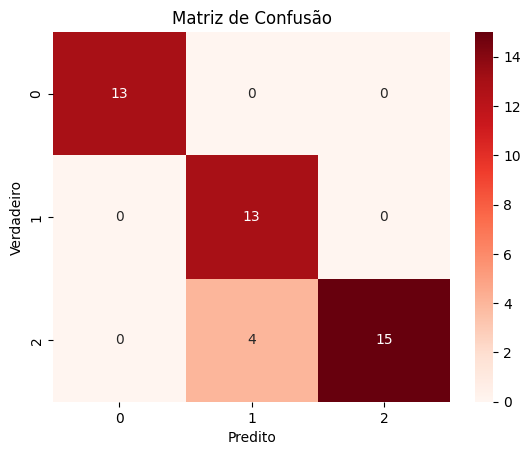

In [24]:
conf_matrix = metrics.confusion_matrix(y1_test, y1_pred)
seaborn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

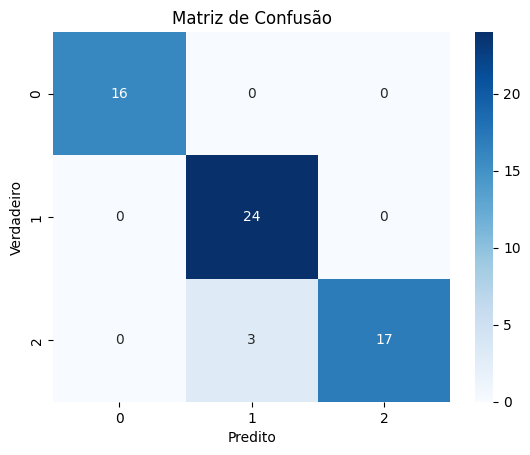

In [25]:
conf_matrix = metrics.confusion_matrix(y2_test, y2_pred)
seaborn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

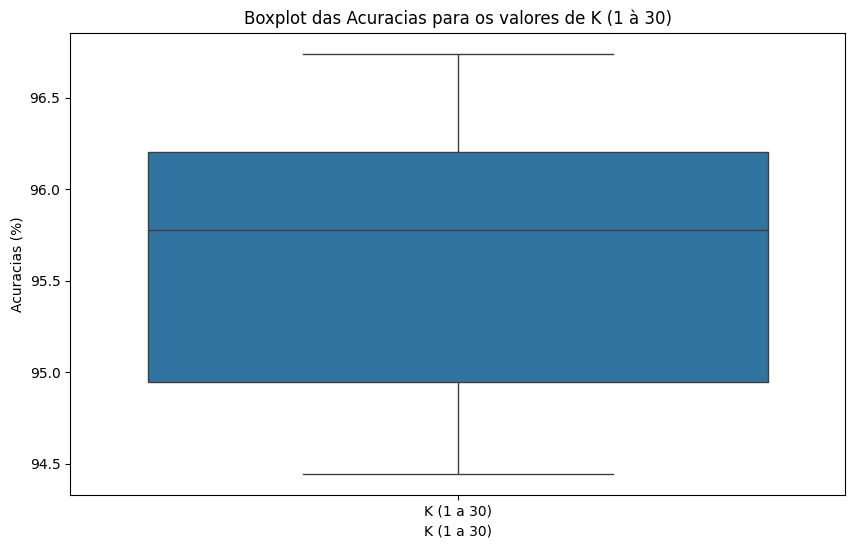

In [13]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=medias)
plt.title('Boxplot das Acuracias para os valores de K (1 à 30)')
plt.ylabel('Acuracias (%)')
plt.xlabel('K (1 a 30)')
plt.show()